In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

import sklearn

import seaborn as sns

In [3]:
df = pd.read_csv('Credit_card.csv')

In [5]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [10]:
df_1 = pd.read_csv('Credit_card_label.csv')

In [12]:
df_1

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [14]:
new_df = pd.concat([df[['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'EDUCATION', 'Marital_status',
       'Housing_type','Employed_days','Family_Members']],
                  df_1[['label']]],axis=1)

In [16]:
new_df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,label
0,M,Y,Y,0,180000.0,Higher education,Married,House / apartment,365243,2,1
1,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,2,1
2,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,2,1
3,F,Y,N,0,NaN,Higher education,Married,House / apartment,-586,2,1
4,F,Y,N,0,315000.0,Higher education,Married,House / apartment,-586,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Higher education,Married,House / apartment,-2182,2,0
1544,F,N,N,0,225000.0,Incomplete higher,Single / not married,House / apartment,-1209,1,0
1545,M,Y,Y,2,180000.0,Higher education,Married,House / apartment,-2477,4,0
1546,M,Y,N,0,270000.0,Secondary / secondary special,Civil marriage,House / apartment,-645,2,0


In [18]:
new_df.isnull().sum()

GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Family_Members     0
label              0
dtype: int64

In [20]:
new_df.dropna(inplace=True)

In [22]:
new_df.isnull().sum()

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
EDUCATION         0
Marital_status    0
Housing_type      0
Employed_days     0
Family_Members    0
label             0
dtype: int64

In [24]:
new_df['CHILDREN'].max()

14

<Axes: >

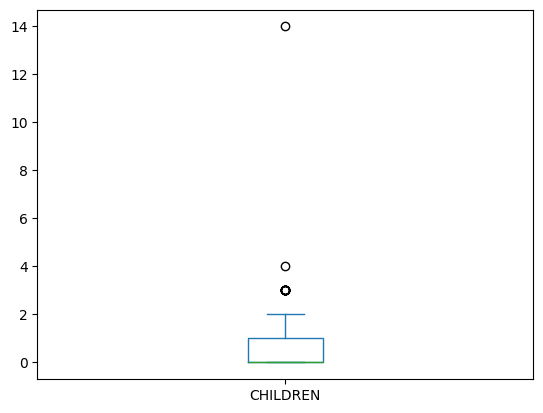

In [26]:
new_df['CHILDREN'].plot(kind= 'box')

In [28]:
new_df['Annual_income'].max()

1575000.0

<Axes: >

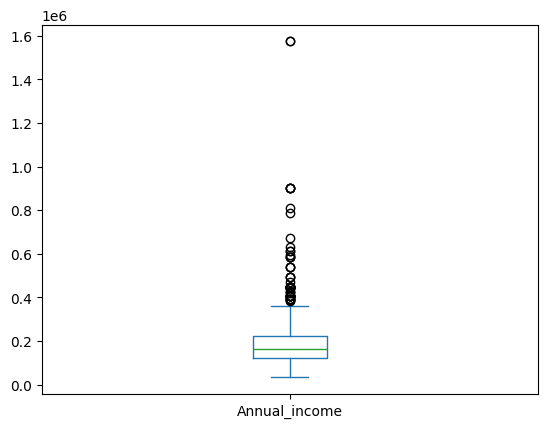

In [30]:
new_df['Annual_income'].plot(kind= 'box')

In [60]:
new_df[new_df['Annual_income'] >= 800000]

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,label
211,F,Y,Y,1,1575000.0,Higher education,Single / not married,House / apartment,-2479,2,0
233,F,Y,Y,1,1575000.0,Higher education,Single / not married,House / apartment,-2479,2,0
242,M,N,Y,1,900000.0,Secondary / secondary special,Married,House / apartment,-4509,3,0
686,M,Y,Y,2,900000.0,Higher education,Married,House / apartment,-1000,4,0
811,M,Y,Y,2,900000.0,Higher education,Married,House / apartment,-1000,4,0
1068,M,Y,Y,1,900000.0,Higher education,Civil marriage,House / apartment,-2537,3,0
1355,M,Y,Y,1,810000.0,Incomplete higher,Civil marriage,Office apartment,-3455,3,0


In [32]:
new_df['Employed_days'].max()

365243

In [42]:
new_df['Employed_days'].describe()

count      1518.000000
mean      59364.335968
std      137828.120795
min      -14887.000000
25%       -3200.250000
50%       -1569.500000
75%        -432.250000
max      365243.000000
Name: Employed_days, dtype: float64

In [52]:
new_df[new_df['Employed_days'] >= 1]

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,label
0,M,Y,Y,0,180000.0,Higher education,Married,House / apartment,365243,2,1
7,F,N,N,0,180000.0,Secondary / secondary special,Married,House / apartment,365243,2,1
26,F,N,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,365243,2,1
31,F,N,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,365243,2,1
37,F,Y,Y,0,76500.0,Secondary / secondary special,Married,House / apartment,365243,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1509,F,Y,Y,0,157500.0,Secondary / secondary special,Widow,House / apartment,365243,1,0
1511,F,N,Y,0,216000.0,Higher education,Single / not married,House / apartment,365243,1,0
1514,F,N,N,0,69750.0,Secondary / secondary special,Widow,Municipal apartment,365243,1,0
1525,F,Y,Y,0,175500.0,Higher education,Married,House / apartment,365243,2,0


<Axes: >

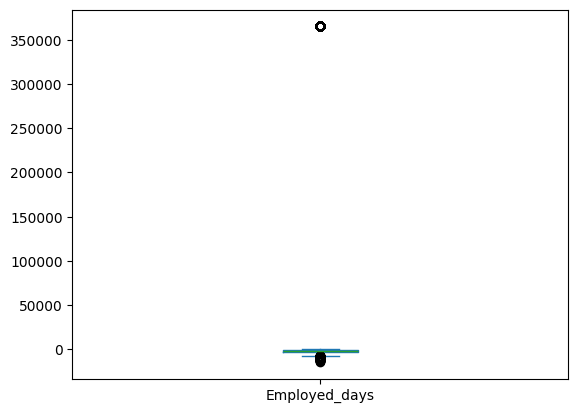

In [34]:
new_df['Employed_days'].plot(kind = 'box')

In [36]:
new_df['Family_Members'].max()

15

<Axes: >

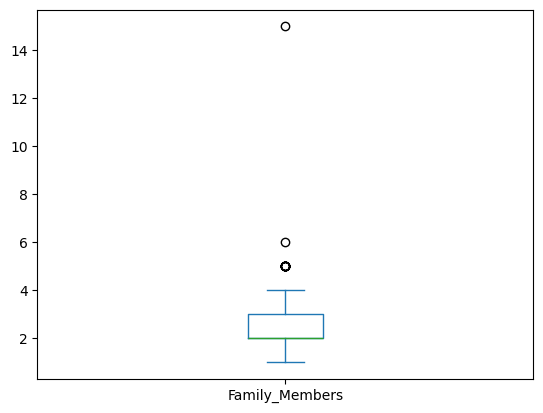

In [38]:
new_df['Family_Members'].plot(kind= 'box')

In [62]:
def cleaning_data_for_greter(data_set_name,columns_name,value):

    for data in data_set_name.index:

        if data_set_name.loc[data,columns_name] >value:

            data_set_name.drop(data,inplace= True)

    return

In [64]:
cleaning_data_for_greter(new_df,'CHILDREN',5)

In [66]:
cleaning_data_for_greter(new_df,'Annual_income',900000)

In [100]:
cleaning_data_for_greter(new_df,'Employed_days',14600)

In [70]:
cleaning_data_for_greter(new_df,'Family_Members',6)

<Axes: >

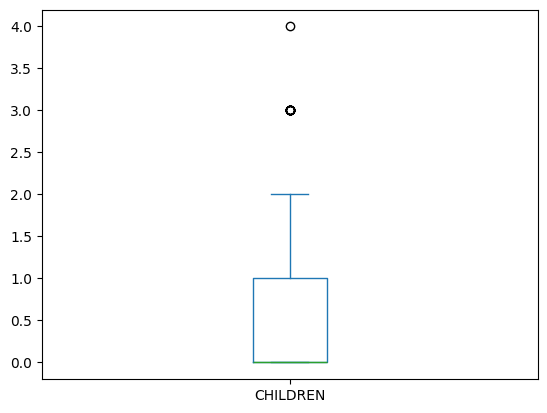

In [72]:
new_df['CHILDREN'].plot(kind= 'box')

<Axes: >

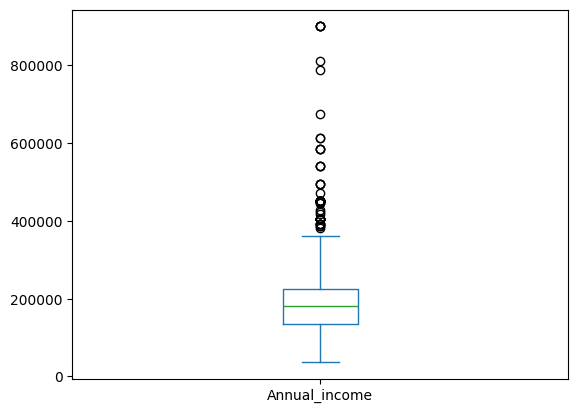

In [74]:
new_df['Annual_income'].plot(kind= 'box')

In [82]:
new_df['Employed_days']= new_df['Employed_days'] * -1

<Axes: >

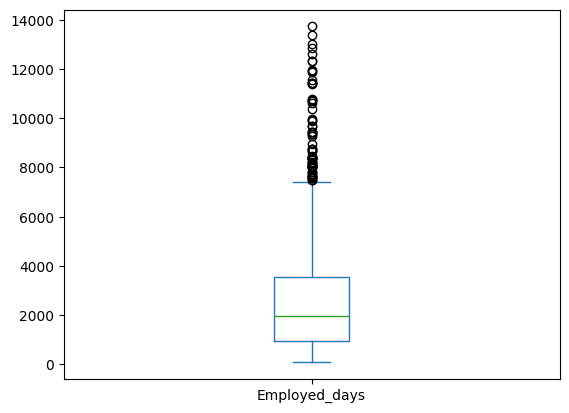

In [106]:
new_df['Employed_days'].plot(kind = 'box')

<Axes: >

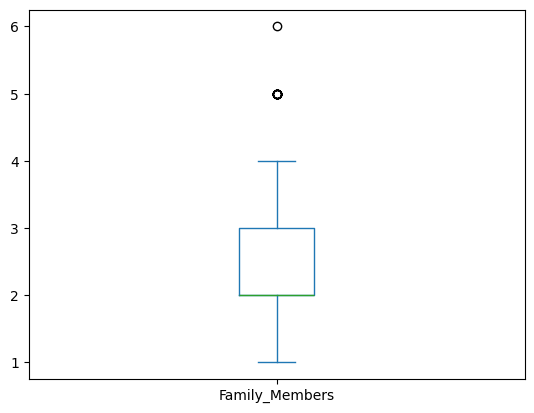

In [86]:
new_df['Family_Members'].plot(kind= 'box')

In [102]:
des = new_df.describe()

In [104]:
des

,CHILDREN,Annual_income,Employed_days,Family_Members,label
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.480922,196694.413355,2675.367250,2.259936,0.104134
std,0.735530,103086.534215,2390.183625,0.912217,0.305555
min,0.000000,36000.000000,73.000000,1.000000,0.000000
25%,0.000000,135000.000000,931.250000,2.000000,0.000000
50%,0.000000,180000.000000,1965.500000,2.000000,0.000000
75%,1.000000,225000.000000,3534.500000,3.000000,0.000000
max,4.000000,900000.000000,13735.000000,6.000000,1.000000


In [66]:
value = new_df[['GENDER','Car_Owner','Propert_Owner','EDUCATION','Marital_status','Housing_type']].value_counts()

In [68]:
value

GENDER  Car_Owner  Propert_Owner  EDUCATION                      Marital_status        Housing_type     
F       N          Y              Secondary / secondary special  Married               House / apartment    138
M       Y          Y              Secondary / secondary special  Married               House / apartment     88
F       N          N              Secondary / secondary special  Married               House / apartment     77
                   Y              Higher education               Married               House / apartment     57
M       Y          Y              Higher education               Married               House / apartment     53
                                                                                                           ... 
F       N          Y              Lower secondary                Civil marriage        With parents           1
M       N          N              Incomplete higher              Married               House / apartment      1

In [73]:
new_df.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Employed_days',
       'Family_Members', 'label'],
      dtype='object')

In [123]:
x = new_df[['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Employed_days',
       'Family_Members']].values

In [125]:
x

array([['F', 'Y', 'N', ..., 'House / apartment', 586, 2],
       ['F', 'Y', 'N', ..., 'House / apartment', 586, 2],
       ['F', 'Y', 'N', ..., 'House / apartment', 586, 2],
       ...,
       ['M', 'Y', 'Y', ..., 'House / apartment', 2477, 4],
       ['M', 'Y', 'N', ..., 'House / apartment', 645, 2],
       ['F', 'Y', 'Y', ..., 'House / apartment', 2859, 2]], dtype=object)

In [177]:
y = new_df['label'].values

In [179]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [117]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder()

In [133]:
x[:,0] = le.fit_transform(x[:,0])

In [135]:
x

array([[0, 'Y', 'N', ..., 'House / apartment', 586, 2],
       [0, 'Y', 'N', ..., 'House / apartment', 586, 2],
       [0, 'Y', 'N', ..., 'House / apartment', 586, 2],
       ...,
       [1, 'Y', 'Y', ..., 'House / apartment', 2477, 4],
       [1, 'Y', 'N', ..., 'House / apartment', 645, 2],
       [0, 'Y', 'Y', ..., 'House / apartment', 2859, 2]], dtype=object)

In [137]:
x[:,1] = le.fit_transform(x[:,1])

In [139]:
x

array([[0, 1, 'N', ..., 'House / apartment', 586, 2],
       [0, 1, 'N', ..., 'House / apartment', 586, 2],
       [0, 1, 'N', ..., 'House / apartment', 586, 2],
       ...,
       [1, 1, 'Y', ..., 'House / apartment', 2477, 4],
       [1, 1, 'N', ..., 'House / apartment', 645, 2],
       [0, 1, 'Y', ..., 'House / apartment', 2859, 2]], dtype=object)

In [141]:
x[:,2]= le.fit_transform(x[:,2])

In [143]:
x

array([[0, 1, 0, ..., 'House / apartment', 586, 2],
       [0, 1, 0, ..., 'House / apartment', 586, 2],
       [0, 1, 0, ..., 'House / apartment', 586, 2],
       ...,
       [1, 1, 1, ..., 'House / apartment', 2477, 4],
       [1, 1, 0, ..., 'House / apartment', 645, 2],
       [0, 1, 1, ..., 'House / apartment', 2859, 2]], dtype=object)

In [145]:
x[:,6]= le.fit_transform(x[:,6])

In [147]:
x

array([[0, 1, 0, ..., 'House / apartment', 586, 2],
       [0, 1, 0, ..., 'House / apartment', 586, 2],
       [0, 1, 0, ..., 'House / apartment', 586, 2],
       ...,
       [1, 1, 1, ..., 'House / apartment', 2477, 4],
       [1, 1, 0, ..., 'House / apartment', 645, 2],
       [0, 1, 1, ..., 'House / apartment', 2859, 2]], dtype=object)

In [163]:
x[:,5]= le.fit_transform(x[:,5])

In [167]:
x

array([[0, 1, 0, ..., 'House / apartment', 586, 2],
       [0, 1, 0, ..., 'House / apartment', 586, 2],
       [0, 1, 0, ..., 'House / apartment', 586, 2],
       ...,
       [1, 1, 1, ..., 'House / apartment', 2477, 4],
       [1, 1, 0, ..., 'House / apartment', 645, 2],
       [0, 1, 1, ..., 'House / apartment', 2859, 2]], dtype=object)

In [169]:
x[:,7]= le.fit_transform(x[:,7])

In [171]:
x

array([[0, 1, 0, ..., 1, 586, 2],
       [0, 1, 0, ..., 1, 586, 2],
       [0, 1, 0, ..., 1, 586, 2],
       ...,
       [1, 1, 1, ..., 1, 2477, 4],
       [1, 1, 0, ..., 1, 645, 2],
       [0, 1, 1, ..., 1, 2859, 2]], dtype=object)

In [181]:
from sklearn.model_selection import train_test_split

In [183]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [185]:
print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

[[1 0 1 ... 1 140 3]
 [1 1 1 ... 1 6908 2]
 [0 1 1 ... 1 101 4]
 ...
 [0 0 0 ... 1 3902 2]
 [1 0 0 ... 1 1505 1]
 [0 0 1 ... 1 4710 3]]

[[0 1 1 ... 1 420 3]
 [0 1 0 ... 2 1128 2]
 [0 0 0 ... 1 4816 2]
 ...
 [0 1 1 ... 1 3944 2]
 [1 0 0 ... 1 450 1]
 [0 0 1 ... 1 5488 2]]

[0 0 0 ... 0 0 0]

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [187]:
from sklearn.linear_model import LogisticRegression

In [189]:
lr = LogisticRegression()

In [191]:
lr.fit(x_train,y_train)

LogisticRegression()

In [193]:
lr.score(x_train,y_train)

0.889662027833002

In [205]:
lr.coef_

array([[ 1.50745500e-09, -3.15280844e-08, -6.43550468e-08,
        -6.69017215e-08, -5.14505408e-06, -4.17721146e-07,
        -7.12329221e-08, -1.72288291e-07, -4.27495215e-04,
        -2.85991210e-07]])

In [209]:
lr.intercept_

array([-1.13432964e-07])

In [220]:
y_pretct = lr.predict(x_test)

In [222]:
y_true = y_test

In [224]:
from sklearn.metrics import accuracy_score

In [228]:
 accuracy = accuracy_score(y_true, y_pretct,  normalize=True, sample_weight=None)

In [232]:
accuracy

0.9206349206349206

In [234]:
from sklearn.metrics import confusion_matrix

In [236]:
con = confusion_matrix(y_true,y_pretct)

In [238]:
con

array([[232,   0],
       [ 20,   0]])

In [240]:
from sklearn.metrics import classification_report

In [242]:
cl = classification_report(y_true,y_pretct)

/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [244]:
cl

'              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96       232\n           1       0.00      0.00      0.00        20\n\n    accuracy                           0.92       252\n   macro avg       0.46      0.50      0.48       252\nweighted avg       0.85      0.92      0.88       252\n'

In [246]:
from sklearn.metrics import mean_absolute_error

In [248]:
m_error = mean_absolute_error(y_true,y_pretct)

In [250]:
m_error

0.07936507936507936

In [252]:
from sklearn.metrics import mean_squared_error

In [254]:
m_s_eroor = mean_squared_error(y_true,y_pretct)

In [256]:
m_s_eroor

0.07936507936507936

In [258]:
from sklearn.metrics import r2_score

In [262]:
r2_s = r2_score(y_true,y_pretct)

In [264]:
r2_s

-0.08620689655172376